# Import Data & Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
dataset_path = '/content/drive/MyDrive/Item dataset/Item_sold_filtered_2021.csv'
data = pd.read_csv(dataset_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526040 entries, 0 to 1526039
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Index           1526040 non-null  int64 
 1   Payment_Date    1526040 non-null  object
 2   Payment_period  1526040 non-null  object
 3   ent             1526040 non-null  object
 4   Sold_product    1526040 non-null  object
 5   Qty sold        1526040 non-null  int64 
 6   Channel         1526040 non-null  object
dtypes: int64(2), object(5)
memory usage: 81.5+ MB


#Member

In [4]:
member = '/content/drive/MyDrive/Original/data member.xlsx'
member = pd.read_excel(member)
member.head()

,ent,original_status,join_month,join_year,sponsor
0,UCC4CC4F,-,5,2014,8844CQCEY
1,UCC4CCEK,-,5,2014,8844CQCCU
2,UCC4CC15,-,5,2014,8844CQCEY
3,UCC4CCR2,-,5,2014,8844CQCEY
4,UCC4CCJP,-,5,2014,8844CQCEY


In [5]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 22.5+ MB


In [6]:
# Assuming your data is stored in a DataFrame called 'df'
distinct_count = member.groupby('sponsor')['ent'].nunique()

# Create a new DataFrame with the desired column names
downline = pd.DataFrame({'ent': distinct_count.index, 'no_downline': distinct_count.values})

downline

,ent,no_downline
0,8841C13JF,1
1,8841C14C5,1
2,8841C14ZF,4
3,8841C1C1U,1
4,8841C1C3F,1
...,...,...
116242,UCC4RW1B,3
116243,UCC4RW40,2
116244,UCC4RWRY,1
116245,UCC4RWZ5,1


In [7]:
# Replace join years before 1986 with 1986
member.loc[member['join_year'] < 1986, 'join_year'] = 1986

# Calculate the lifetime
current_year = 2021
member['lifetime'] = current_year - member['join_year']

# Perform one-hot encoding on 'original_status'
one_hot_encoded = pd.get_dummies(member['original_status'], prefix='Status')

# Concatenate the one-hot encoded columns with the original DataFrame
member = pd.concat([member, one_hot_encoded], axis=1)

In [8]:
# Columns to drop
member_to_drop = ['original_status','join_month','join_year','sponsor'] #'Total_Amount','Avg_Amount_per_Purchase'

# Drop the columns
member = member.drop(columns=member_to_drop).fillna(0)
member.tail()

,ent,lifetime,Status_-,Status_A,Status_B,Status_C,Status_D,Status_E,Status_F,Status_H,Status_I,Status_J,Status_K,Status_L,Status_M,Status_N,Status_O
590560,H3CCC43B,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
590561,H3CCC4ZY,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
590562,H3CCCEC7,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
590563,H3CCCE4I,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
590564,H3CCCEEF,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
member = member.merge(downline, on='ent')

In [10]:
member

,ent,lifetime,Status_-,Status_A,Status_B,Status_C,Status_D,Status_E,Status_F,Status_H,Status_I,Status_J,Status_K,Status_L,Status_M,Status_N,Status_O,no_downline
0,UCC4CC4F,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,UCC4CC15,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,UCC4CCJP,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,UCC4CCQ0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,UCC4CC3B,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116241,H3CCC415,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
116242,H3CCC4R2,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
116243,H3CCC4JP,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
116244,H3CCC4WU,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#Customer Value

In [11]:
value = '/content/drive/MyDrive/Original/transaction 2021.xlsx'
value = pd.read_excel(value)

In [12]:
# Calculate Total Amount Spent per Customer (assuming no price column is available)
total_amount = value.groupby('ent')['total_amount'].sum()  # Assuming the quantity sold represents the amount spent

# Calculate Average Amount per Purchase per Customer
avg_amount_per_purchase = value.groupby(['ent', 'payment_date'])['total_amount'].mean().groupby('ent').mean()

In [13]:
# Create a new DataFrame for customer segmentation
customer_value = pd.DataFrame({
    'Total_Amount': total_amount,
    'Avg_Ticket': avg_amount_per_purchase,
})

# Print the customer segmentation DataFrame
print(customer_value)

             Total_Amount    Avg_Ticket
ent                                    
8C4ECCCCC3Y      823000.0  4.115000e+05
8CCCCCC4R1F     3798000.0  1.899000e+06
BC11JW3U        4579000.0  4.005000e+05
BCCCCRE3CZY      410000.0  4.100000e+05
BCCCCREW3WY     2567500.0  1.033125e+06
...                   ...           ...
TZZZJ3WP       22507000.0  1.142474e+06
TZZZJZ4Y        1283000.0  6.415000e+05
TZZZREZF        7663000.0  5.346538e+05
TZZZW417          50000.0  5.000000e+04
TZZZZEZ0       15577000.0  9.060938e+05

[325627 rows x 2 columns]


In [14]:
customer_value = customer_value.reset_index()

In [15]:
# Calculate Total Amount Spent per Customer (assuming no price column is available)
total_amount = value.groupby(['ent', 'trans_origin_type'])['total_amount'].sum()  # Assuming the quantity sold represents the amount spent

# Calculate Average amount per Purchase per Customer
avg_amount_per_purchase = value.groupby(['ent', 'trans_origin_type', 'payment_date'])['total_amount'].mean().groupby(['ent', 'trans_origin_type']).mean()

# Calculate Proportion of Total Amount by Channel
proportion_total_Amount = total_amount / value.groupby('ent')['total_amount'].sum()

# Calculate Proportion of Total Amount by Channel
proportion_total_ticket = avg_amount_per_purchase / value.groupby(['ent', 'payment_date'])['total_amount'].mean().groupby('ent').mean()

In [16]:
# Create a new DataFrame for customer segmentation by channel
value_channel = pd.DataFrame({
    'Total_Amount': total_amount,
    'Avg_Ticket': avg_amount_per_purchase,
    '%_Total_Amount': proportion_total_Amount,
    #'%_Avg_ticket': proportion_total_ticket
})

In [17]:
value_channel = value_channel.reset_index()

In [18]:
# Pivot the DataFrame by 'Channel'
pivoted_value = value_channel.pivot(index='ent', columns='trans_origin_type')

# Flatten the MultiIndex column names
pivoted_value.columns = [f'{col[0]}_{col[1]}' for col in pivoted_value.columns]

# Reset the index
pivoted_value = pivoted_value.reset_index()

# Print the pivoted DataFrame
pivoted_value.tail()

,ent,Total_Amount_offline,Total_Amount_online,Avg_Ticket_offline,Avg_Ticket_online,%_Total_Amount_offline,%_Total_Amount_online
325622,TZZZJ3WP,15735000.0,6772000.0,1.066786e+06,1354400.0,0.699116,0.300884
325623,TZZZJZ4Y,1283000.0,NaN,6.415000e+05,NaN,1.000000,NaN
325624,TZZZREZF,7663000.0,NaN,5.346538e+05,NaN,1.000000,NaN
325625,TZZZW417,50000.0,NaN,5.000000e+04,NaN,1.000000,NaN
325626,TZZZZEZ0,10031000.0,5546000.0,7.459583e+05,1386500.0,0.643962,0.356038


In [19]:
merged_value = customer_value.merge(pivoted_value, on='ent')


In [20]:
merged_value

,ent,Total_Amount,Avg_Ticket,Total_Amount_offline,Total_Amount_online,Avg_Ticket_offline,Avg_Ticket_online,%_Total_Amount_offline,%_Total_Amount_online
0,8C4ECCCCC3Y,823000.0,4.115000e+05,50000.0,773000.0,5.000000e+04,773000.0,0.060753,0.939247
1,8CCCCCC4R1F,3798000.0,1.899000e+06,NaN,3798000.0,NaN,1899000.0,NaN,1.000000
2,BC11JW3U,4579000.0,4.005000e+05,1866000.0,2713000.0,2.332500e+05,1069500.0,0.407513,0.592487
3,BCCCCRE3CZY,410000.0,4.100000e+05,410000.0,NaN,4.100000e+05,NaN,1.000000,NaN
4,BCCCCREW3WY,2567500.0,1.033125e+06,1567500.0,1000000.0,7.837500e+05,1000000.0,0.610516,0.389484
...,...,...,...,...,...,...,...,...,...
325622,TZZZJ3WP,22507000.0,1.142474e+06,15735000.0,6772000.0,1.066786e+06,1354400.0,0.699116,0.300884
325623,TZZZJZ4Y,1283000.0,6.415000e+05,1283000.0,NaN,6.415000e+05,NaN,1.000000,NaN
325624,TZZZREZF,7663000.0,5.346538e+05,7663000.0,NaN,5.346538e+05,NaN,1.000000,NaN
325625,TZZZW417,50000.0,5.000000e+04,50000.0,NaN,5.000000e+04,NaN,1.000000,NaN


# Behaviour Item

In [21]:
max = pd.to_datetime(data['Payment_Date']).max()
max

Timestamp('2021-06-23 00:00:00+0000', tz='UTC')

In [22]:
# Calculate Total Quantity Purchased per Customer
total_quantity = data.groupby('ent')['Qty sold'].sum()

# Calculate Average Quantity per Purchase per Customer
avg_quantity_per_purchase = data.groupby(['ent', 'Payment_Date'])['Qty sold'].mean().groupby('ent').mean()

# Calculate Number of Unique Items Purchased per Customer
unique_items = data.groupby('ent')['Sold_product'].nunique()

# Calculate Purchase Frequency per Customer
purchase_frequency = data.groupby('ent')['Payment_Date'].nunique()

# Determine Most Purchased Item Category per Customer
most_purchased_category = data.groupby('ent')['Sold_product'].apply(lambda x: x.value_counts().index[0])

# Calculate Proportion of Purchases by Category per Customer
proportion_by_category = data.groupby(['ent', 'Sold_product']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Calculate Recency of Last Purchase per Customer
# recency_last_purchase = pd.to_datetime(data.groupby('ent')['Payment_Date'].max())
recency_last_purchase = (max - pd.to_datetime(data.groupby('ent')['Payment_Date'].max())).dt.days

# Calculate Average Spend per Transaction per Customer
avg_spend_per_transaction = total_quantity / purchase_frequency

In [23]:
# Calculate Total Quantity Purchased per Customer
total_quantity_Channel = data.groupby(['ent', 'Channel'])['Qty sold'].sum()
total_quantity_Channel

ent          Channel
8C4ECCCCC3Y  offline     1
             online      1
8CCCCCC4R1F  online      8
BC11JW3U     offline    11
             online      4
                        ..
TZZZJZ4Y     offline     9
TZZZREZF     offline    22
TZZZW417     offline     1
TZZZZEZ0     offline    32
             online     13
Name: Qty sold, Length: 426160, dtype: int64

In [24]:
# Create a new DataFrame for customer segmentation
customer_segmentation = pd.DataFrame({
    'Total_Quantity': total_quantity,
    #'Total_Amount': total_amount,
    'Avg_Quantity_per_Purchase': avg_quantity_per_purchase,
    #'Avg_Amount_per_Purchase': avg_amount_per_purchase,
    'Unique_Items': unique_items,
    'Purchase_Frequency': purchase_frequency,
    'Most_Purchased_Category': most_purchased_category,
    'Recency_Last_Purchase': recency_last_purchase,
    'Avg_Spend_per_Transaction': avg_spend_per_transaction
})

# Print the customer segmentation DataFrame
print(customer_segmentation)

             Total_Quantity  Avg_Quantity_per_Purchase  Unique_Items  \
ent                                                                    
8C4ECCCCC3Y               2                   1.000000             2   
8CCCCCC4R1F               8                   1.500000             5   
BC11JW3U                 15                   1.150000            11   
BCCCCRE3CZY               1                   1.000000             1   
BCCCCREW3WY               4                   1.250000             3   
...                     ...                        ...           ...   
TZZZJ3WP                 42                   1.842105            17   
TZZZJZ4Y                  9                   3.750000             3   
TZZZREZF                 22                   1.269231            10   
TZZZW417                  1                   1.000000             1   
TZZZZEZ0                 45                   1.519792            14   

             Purchase_Frequency Most_Purchased_Category  \
ent 

# By Channel

In [25]:
# Calculate Total Quantity Purchased per Customer
total_quantity = data.groupby(['ent', 'Channel'])['Qty sold'].sum()

# Calculate Total Amount Spent per Customer (assuming no price column is available)
# total_amount = data.groupby(['ent', 'Channel'])['Qty sold'].sum()  # Assuming the quantity sold represents the amount spent

# Calculate Average Quantity per Purchase per Customer
avg_quantity_per_purchase = data.groupby(['ent', 'Channel', 'Payment_Date'])['Qty sold'].mean().groupby(['ent', 'Channel']).mean()

# Calculate Average Amount per Purchase per Customer
# avg_amount_per_purchase = avg_quantity_per_purchase  # Assuming quantity sold represents the amount spent

# Calculate Number of Unique Items Purchased per Customer
unique_items = data.groupby(['ent', 'Channel'])['Sold_product'].nunique()

# Calculate Purchase Frequency per Customer
purchase_frequency = data.groupby(['ent', 'Channel'])['Payment_Date'].nunique()

# Calculate Proportion of Total Amount by Channel
proportion_total_quantity = total_quantity / data.groupby('Channel')['Qty sold'].sum()

# Calculate Proportion of Avg_Quantity_per_Purchase
proportion_Avg_Quantity_per_Purchase = avg_quantity_per_purchase / data.groupby(['ent', 'Payment_Date'])['Qty sold'].mean().groupby('ent').mean()

# Calculate Proportion of unique_items
proportion_unique_items = unique_items / data.groupby('ent')['Sold_product'].nunique()

# Calculate Proportion of purchase_frequency
proportion_purchase_frequency = purchase_frequency / data.groupby('ent')['Payment_Date'].nunique()

# Create a new DataFrame for customer segmentation by channel
customer_segmentation_channel = pd.DataFrame({
    'Total_Quantity': total_quantity,
    #'Total_Amount': total_amount,
    'Avg_Quantity_per_Purchase': avg_quantity_per_purchase,
    #'Avg_Amount_per_Purchase': avg_amount_per_purchase,
    'Unique_Items': unique_items,
    'Purchase_Frequency': purchase_frequency,
    '%_Total_Qty': proportion_total_quantity,
    #'%_Avg_Quantity_per_Purchase': proportion_Avg_Quantity_per_Purchase,
    '%_unique_items' : proportion_unique_items,
    '%_purchase_frequency' : proportion_purchase_frequency
})

In [26]:
customer_segmentation_channel = customer_segmentation_channel.reset_index()
customer_segmentation_channel

,ent,Channel,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,%_Total_Qty,%_unique_items,%_purchase_frequency
0,8C4ECCCCC3Y,offline,1,1.000000,1,1,7.052385e-07,0.500000,0.50
1,8C4ECCCCC3Y,online,1,1.000000,1,1,1.162653e-06,0.500000,0.50
2,8CCCCCC4R1F,online,8,1.500000,5,2,9.301222e-06,1.000000,1.00
3,BC11JW3U,offline,11,1.125000,8,8,7.757624e-06,0.727273,0.80
4,BC11JW3U,online,4,1.250000,3,2,4.650611e-06,0.272727,0.20
...,...,...,...,...,...,...,...,...,...
426155,TZZZJZ4Y,offline,9,3.750000,3,2,6.347147e-06,1.000000,1.00
426156,TZZZREZF,offline,22,1.269231,10,13,1.551525e-05,1.000000,1.00
426157,TZZZW417,offline,1,1.000000,1,1,7.052385e-07,1.000000,1.00
426158,TZZZZEZ0,offline,32,1.470833,10,12,2.256763e-05,0.714286,0.75


In [27]:
# Pivot the DataFrame by 'Channel'
pivoted_df = customer_segmentation_channel.pivot(index='ent', columns='Channel')

# Flatten the MultiIndex column names
pivoted_df.columns = [f'{col[0]}_{col[1]}' for col in pivoted_df.columns]

# Reset the index
pivoted_channel = pivoted_df.reset_index()

# Print the pivoted DataFrame
pivoted_channel.tail()

,ent,Total_Quantity_offline,Total_Quantity_online,Avg_Quantity_per_Purchase_offline,Avg_Quantity_per_Purchase_online,Unique_Items_offline,Unique_Items_online,Purchase_Frequency_offline,Purchase_Frequency_online,%_Total_Qty_offline,%_Total_Qty_online,%_unique_items_offline,%_unique_items_online,%_purchase_frequency_offline,%_purchase_frequency_online
325622,TZZZJ3WP,33.0,9.0,2.000000,1.400000,13.0,5.0,14.0,5.0,2.327287e-05,0.000010,0.764706,0.294118,0.736842,0.263158
325623,TZZZJZ4Y,9.0,NaN,3.750000,NaN,3.0,NaN,2.0,NaN,6.347147e-06,NaN,1.000000,NaN,1.000000,NaN
325624,TZZZREZF,22.0,NaN,1.269231,NaN,10.0,NaN,13.0,NaN,1.551525e-05,NaN,1.000000,NaN,1.000000,NaN
325625,TZZZW417,1.0,NaN,1.000000,NaN,1.0,NaN,1.0,NaN,7.052385e-07,NaN,1.000000,NaN,1.000000,NaN
325626,TZZZZEZ0,32.0,13.0,1.470833,1.666667,10.0,8.0,12.0,4.0,2.256763e-05,0.000015,0.714286,0.571429,0.750000,0.250000


In [28]:
customer_segmentation = customer_segmentation.reset_index()
customer_segmentation.tail()

,ent,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,Most_Purchased_Category,Recency_Last_Purchase,Avg_Spend_per_Transaction
325622,TZZZJ3WP,42,1.842105,17,19,8C4CCJ,17,2.210526
325623,TZZZJZ4Y,9,3.750000,3,2,4144,60,4.500000
325624,TZZZREZF,22,1.269231,10,13,UC4CC1,6,1.692308
325625,TZZZW417,1,1.000000,1,1,XP9LI,23,1.000000
325626,TZZZZEZ0,45,1.519792,14,16,8C4CC4,0,2.812500


#Merge Feature

In [29]:
# Merge the DataFrames on 'ent'
merged_df = customer_segmentation.merge(pivoted_df, on='ent')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325627 entries, 0 to 325626
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ent                                325627 non-null  object 
 1   Total_Quantity                     325627 non-null  int64  
 2   Avg_Quantity_per_Purchase          325627 non-null  float64
 3   Unique_Items                       325627 non-null  int64  
 4   Purchase_Frequency                 325627 non-null  int64  
 5   Most_Purchased_Category            325627 non-null  object 
 6   Recency_Last_Purchase              325627 non-null  int64  
 7   Avg_Spend_per_Transaction          325627 non-null  float64
 8   Total_Quantity_offline             247371 non-null  float64
 9   Total_Quantity_online              178789 non-null  float64
 10  Avg_Quantity_per_Purchase_offline  247371 non-null  float64
 11  Avg_Quantity_per_Purchase_online   1787

In [30]:
merged_df = merged_df.merge(member, on='ent')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48888 entries, 0 to 48887
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ent                                48888 non-null  object 
 1   Total_Quantity                     48888 non-null  int64  
 2   Avg_Quantity_per_Purchase          48888 non-null  float64
 3   Unique_Items                       48888 non-null  int64  
 4   Purchase_Frequency                 48888 non-null  int64  
 5   Most_Purchased_Category            48888 non-null  object 
 6   Recency_Last_Purchase              48888 non-null  int64  
 7   Avg_Spend_per_Transaction          48888 non-null  float64
 8   Total_Quantity_offline             40839 non-null  float64
 9   Total_Quantity_online              34280 non-null  float64
 10  Avg_Quantity_per_Purchase_offline  40839 non-null  float64
 11  Avg_Quantity_per_Purchase_online   34280 non-null  flo

In [31]:
merged_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325627 entries, 0 to 325626
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ent                     325627 non-null  object 
 1   Total_Amount            325627 non-null  float64
 2   Avg_Ticket              325627 non-null  float64
 3   Total_Amount_offline    247371 non-null  float64
 4   Total_Amount_online     178789 non-null  float64
 5   Avg_Ticket_offline      247371 non-null  float64
 6   Avg_Ticket_online       178789 non-null  float64
 7   %_Total_Amount_offline  244732 non-null  float64
 8   %_Total_Amount_online   178789 non-null  float64
dtypes: float64(8), object(1)
memory usage: 24.8+ MB


In [32]:
merged_df = merged_df.merge(merged_value, on='ent')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48888 entries, 0 to 48887
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ent                                48888 non-null  object 
 1   Total_Quantity                     48888 non-null  int64  
 2   Avg_Quantity_per_Purchase          48888 non-null  float64
 3   Unique_Items                       48888 non-null  int64  
 4   Purchase_Frequency                 48888 non-null  int64  
 5   Most_Purchased_Category            48888 non-null  object 
 6   Recency_Last_Purchase              48888 non-null  int64  
 7   Avg_Spend_per_Transaction          48888 non-null  float64
 8   Total_Quantity_offline             40839 non-null  float64
 9   Total_Quantity_online              34280 non-null  float64
 10  Avg_Quantity_per_Purchase_offline  40839 non-null  float64
 11  Avg_Quantity_per_Purchase_online   34280 non-null  flo

In [33]:
merged_df['CLV'] = merged_df['Total_Amount']* merged_df['lifetime']

In [34]:
# Columns to drop
columns_to_drop = ['Total_Quantity_offline', 'Total_Quantity_online', 'Avg_Quantity_per_Purchase_offline',
                   'Avg_Quantity_per_Purchase_online', 'Unique_Items_offline', 'Unique_Items_online',
                   'Purchase_Frequency_offline', 'Purchase_Frequency_online','Total_Amount_offline','Total_Amount_online',
                   'Avg_Ticket_offline','Avg_Ticket_online'] #'Total_Amount','Avg_Amount_per_Purchase'

# Drop the columns
feature = merged_df.drop(columns=columns_to_drop).fillna(0)
feature.tail()

,ent,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,Most_Purchased_Category,Recency_Last_Purchase,Avg_Spend_per_Transaction,%_Total_Qty_offline,%_Total_Qty_online,...,Status_L,Status_M,Status_N,Status_O,no_downline,Total_Amount,Avg_Ticket,%_Total_Amount_offline,%_Total_Amount_online,CLV
48883,TZZWJ4W5,38,1.185185,14,18,5C4CCE,1,2.111111,2.679906e-05,0.000000,...,0,0,0,0,5,15824000.0,8.349444e+05,1.000000,0.000000,110768000.0
48884,TZZZ3JC2,35,2.283333,8,10,5C4CCE,15,3.500000,2.397811e-05,0.000001,...,0,0,0,0,9,18476000.0,1.847600e+06,0.916324,0.083676,129332000.0
48885,TZZZC415,1,1.000000,1,1,8CECCZ,19,1.000000,7.052385e-07,0.000000,...,0,0,0,0,8,1588000.0,1.588000e+06,1.000000,0.000000,11116000.0
48886,TZZZJ3WP,42,1.842105,17,19,8C4CCJ,17,2.210526,2.327287e-05,0.000010,...,0,1,0,0,39,22507000.0,1.142474e+06,0.699116,0.300884,157549000.0
48887,TZZZZEZ0,45,1.519792,14,16,8C4CC4,0,2.812500,2.256763e-05,0.000015,...,0,0,0,0,8,15577000.0,9.060938e+05,0.643962,0.356038,109039000.0


In [35]:
# Perform one-hot encoding using get_dummies()
# dummy_df = pd.get_dummies(feature['Most_Purchased_Category'], prefix='Category')

# Concatenate the dummy variables with the original DataFrame
# feature = pd.concat([feature, dummy_df], axis=1)

# Drop the original 'Most_Purchased_Category' column
feature = feature.drop('Most_Purchased_Category', axis=1)

In [36]:
# Drop the original 'Most_Purchased_Category' column
feature = feature.drop('ent', axis=1)

In [37]:
feature.tail()

,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,Recency_Last_Purchase,Avg_Spend_per_Transaction,%_Total_Qty_offline,%_Total_Qty_online,%_unique_items_offline,%_unique_items_online,...,Status_L,Status_M,Status_N,Status_O,no_downline,Total_Amount,Avg_Ticket,%_Total_Amount_offline,%_Total_Amount_online,CLV
48883,38,1.185185,14,18,1,2.111111,2.679906e-05,0.000000,1.000000,0.000000,...,0,0,0,0,5,15824000.0,8.349444e+05,1.000000,0.000000,110768000.0
48884,35,2.283333,8,10,15,3.500000,2.397811e-05,0.000001,0.875000,0.125000,...,0,0,0,0,9,18476000.0,1.847600e+06,0.916324,0.083676,129332000.0
48885,1,1.000000,1,1,19,1.000000,7.052385e-07,0.000000,1.000000,0.000000,...,0,0,0,0,8,1588000.0,1.588000e+06,1.000000,0.000000,11116000.0
48886,42,1.842105,17,19,17,2.210526,2.327287e-05,0.000010,0.764706,0.294118,...,0,1,0,0,39,22507000.0,1.142474e+06,0.699116,0.300884,157549000.0
48887,45,1.519792,14,16,0,2.812500,2.256763e-05,0.000015,0.714286,0.571429,...,0,0,0,0,8,15577000.0,9.060938e+05,0.643962,0.356038,109039000.0


#Clustering

In [38]:
# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(feature)

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

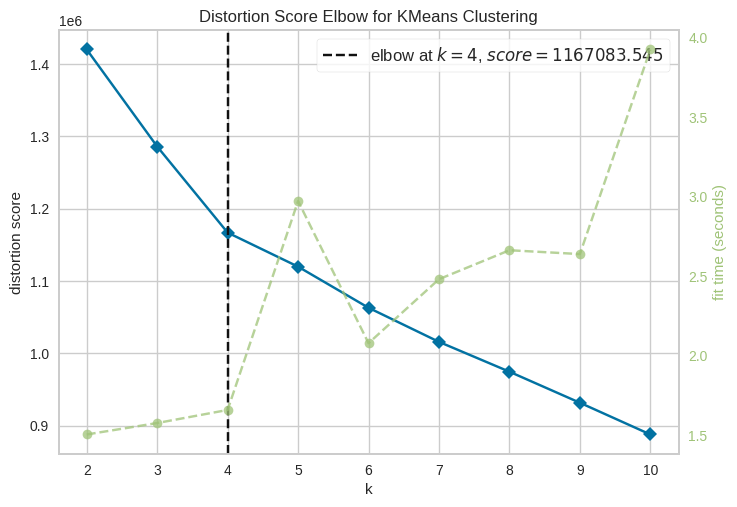

In [39]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=158), k=10, scoere='calinski_harabasz')
Elbow_M.fit(df_features_scaled)
Elbow_M.show();

For n_clusters = 3 The average silhouette_score is: 0.23733134375345907
For n_clusters = 4 The average silhouette_score is: 0.23758185640280155
For n_clusters = 5 The average silhouette_score is: 0.23801813377458775
For n_clusters = 6 The average silhouette_score is: 0.24113597964305067


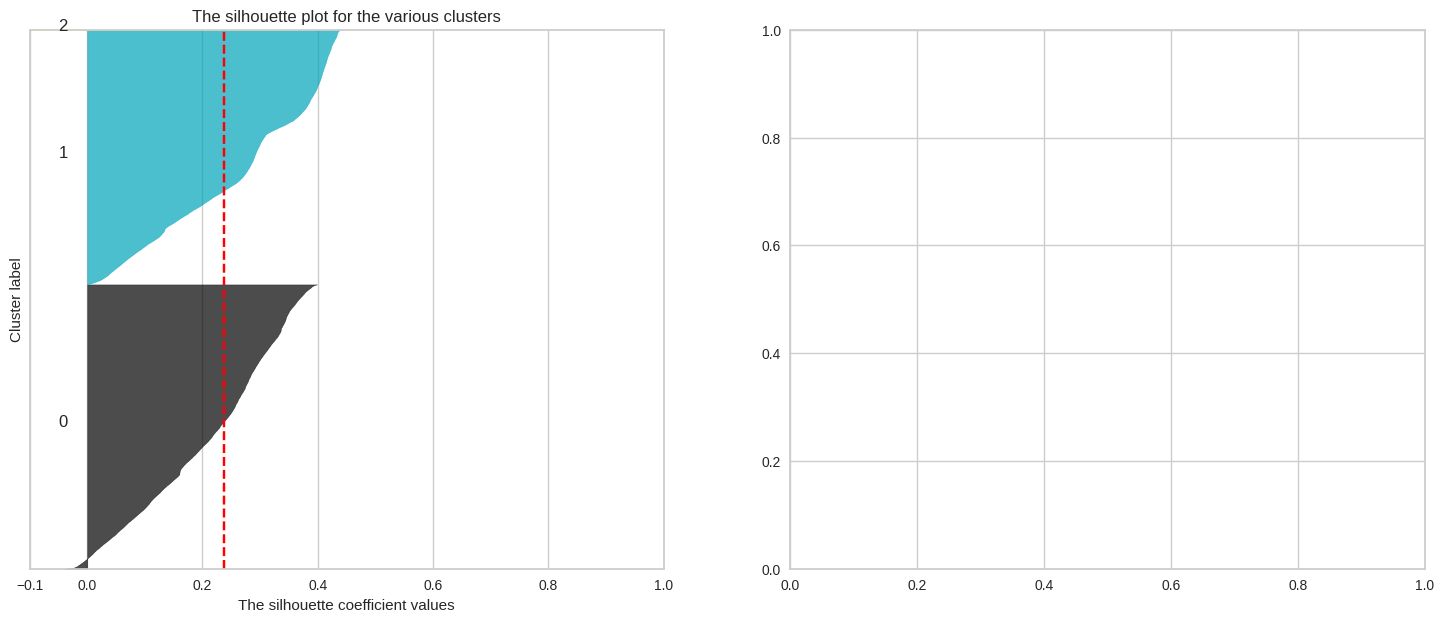

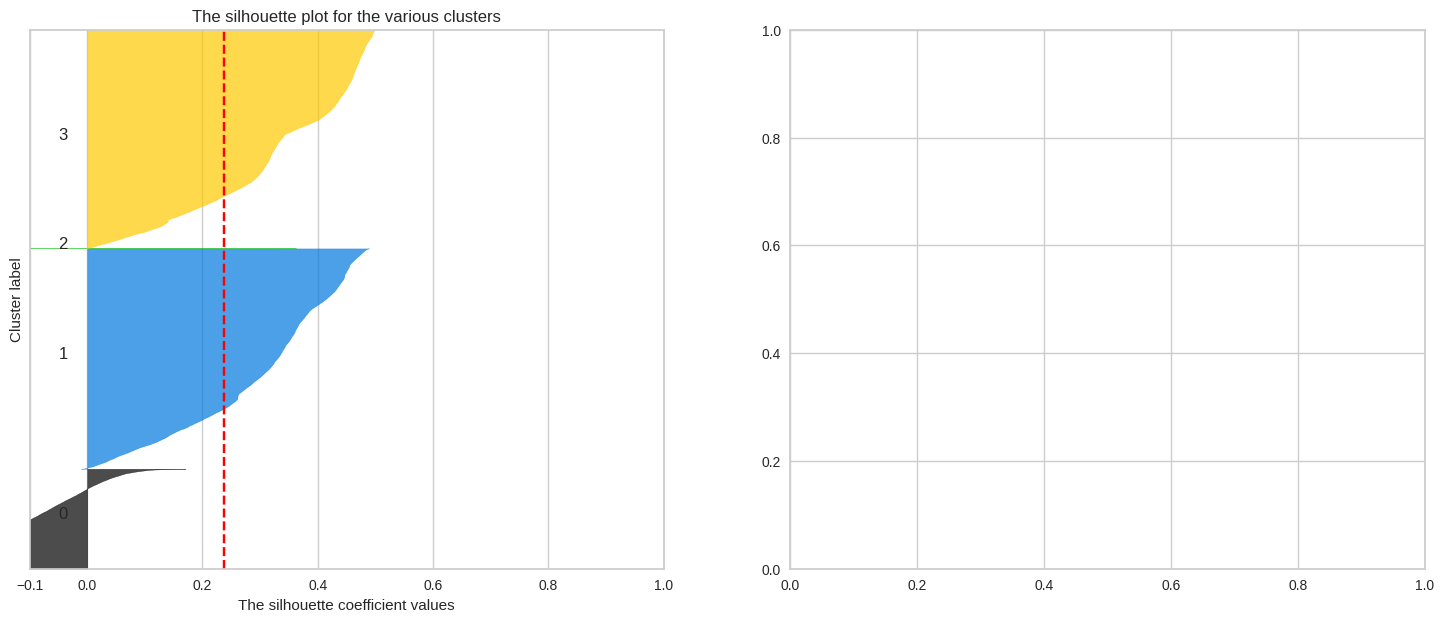

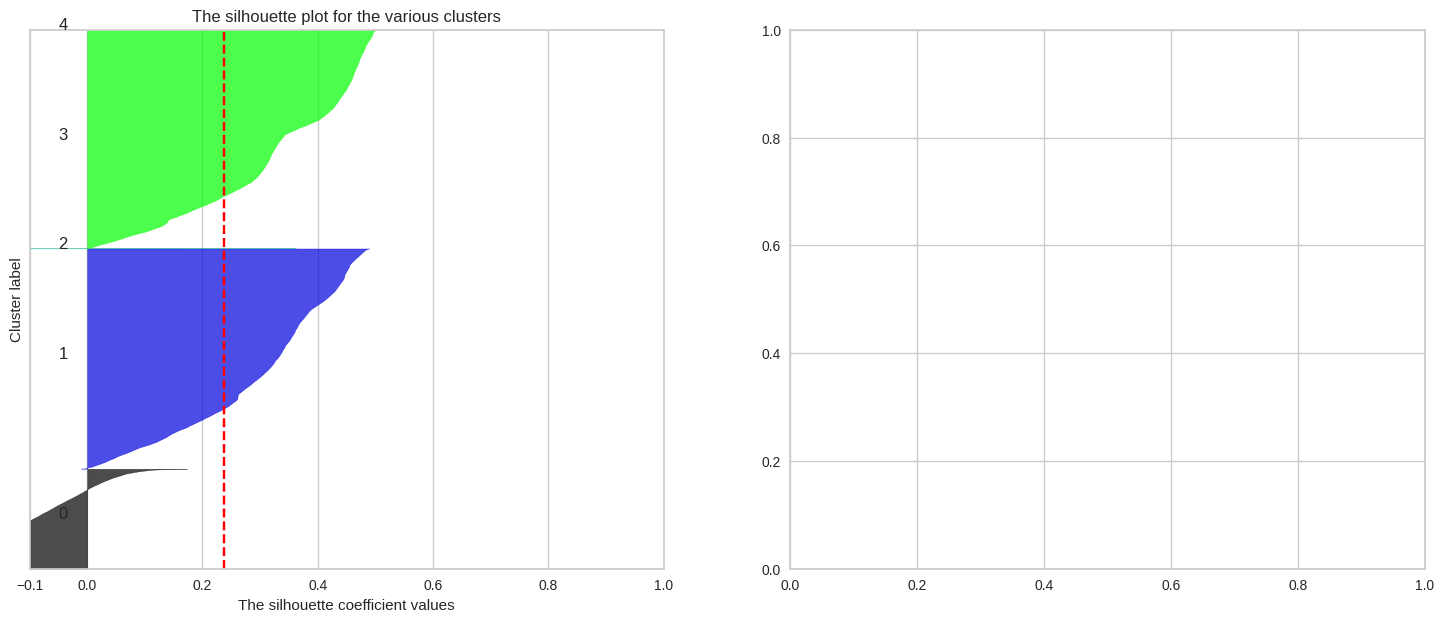

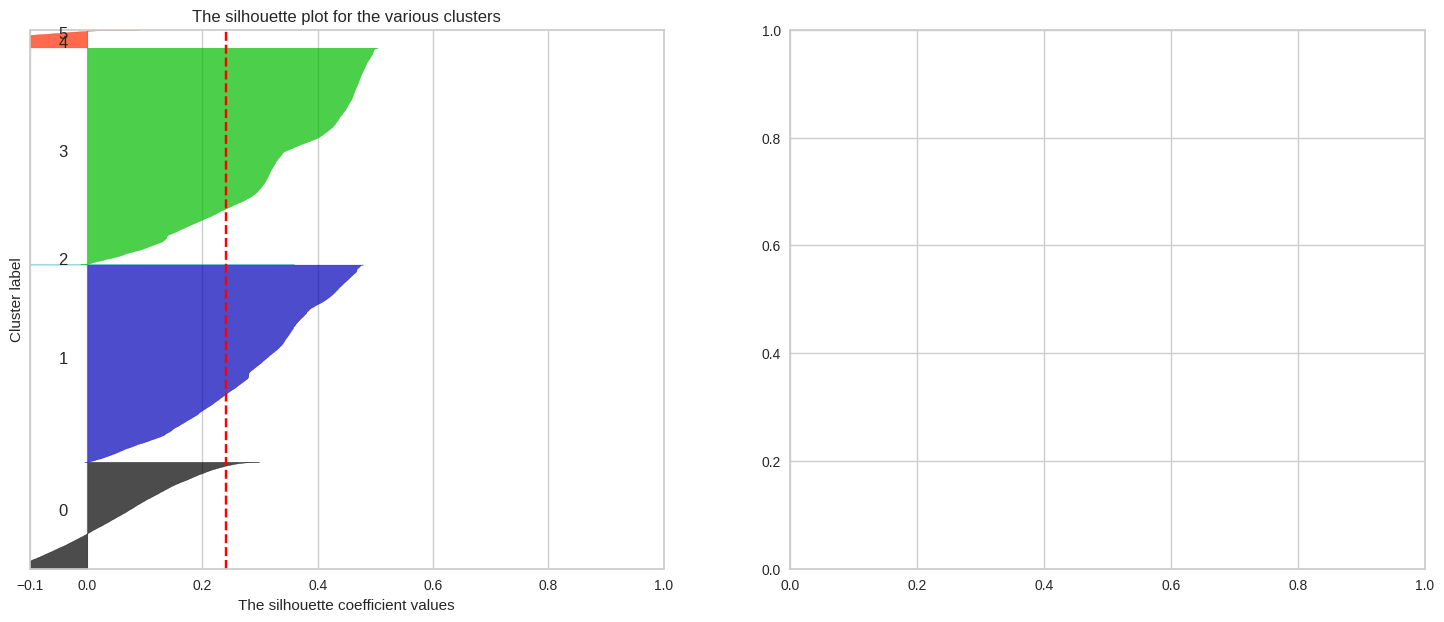

In [40]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

# Generating the sample data
X = df_features_scaled
n_samples, n_features = X.shape
centers = 4
cluster_std = 1

range_n_clusters = [3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1, but in this example, all
    # values lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y-axis labels/ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed
    colors = cm

## Fit & Predict the model

In [41]:
# Initiating the K-means Clustering model
KM = KMeans(n_clusters=4, random_state=666)

In [42]:
# Fit model and predict clusters
yhat_KM = KM.fit_predict(df_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
# create a new column in the scaled dataframe with the cluster labels
df_features_scaled = pd.DataFrame(df_features_scaled, columns=feature.columns)
df_features_scaled["Clusters"] = pd.Series(yhat_KM, index=df_features_scaled.index)

In [44]:
# Adding the Clusters feature to the original dataframe.
merged_df["Clusters"] = df_features_scaled["Clusters"]

In [45]:
# calculate Silhouette Coefficient
score = silhouette_score(df_features_scaled, yhat_KM)
print(f"For k=4, the Silhouette Coefficient is {score:.2f}")

For k=4, the Silhouette Coefficient is 0.26


##Principle Component Analysis

In [46]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(df_features_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_features_scaled), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,48888.0,1.767346e-16,2.592630,-4.221313,-2.910228,0.367090,2.182731,16.778847
PC2,48888.0,-2.790546e-17,2.246401,-3.401602,-1.295964,-0.186275,0.771982,114.788150


In [47]:
PCA_ds["Clusters"] = yhat_KM

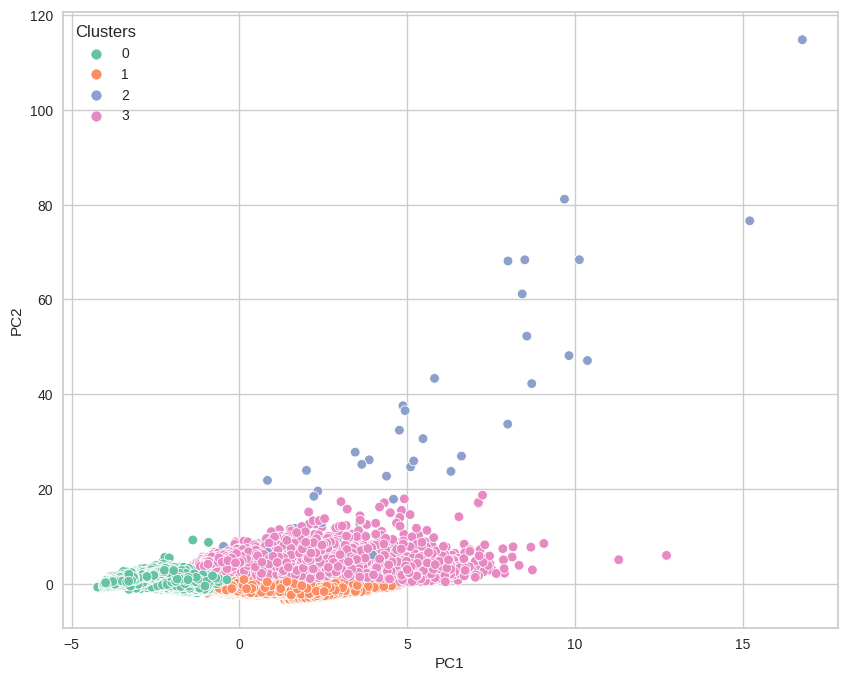

In [48]:
# Plot the clusters on reduced dimension data
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=PCA_ds, palette="Set2")
plt.show()

## Export Train Result

In [49]:
cluster_results = merged_df

In [50]:
cluster_results = cluster_results.drop(columns=columns_to_drop).fillna(0)

In [51]:
cluster_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48888 entries, 0 to 48887
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ent                           48888 non-null  object 
 1   Total_Quantity                48888 non-null  int64  
 2   Avg_Quantity_per_Purchase     48888 non-null  float64
 3   Unique_Items                  48888 non-null  int64  
 4   Purchase_Frequency            48888 non-null  int64  
 5   Most_Purchased_Category       48888 non-null  object 
 6   Recency_Last_Purchase         48888 non-null  int64  
 7   Avg_Spend_per_Transaction     48888 non-null  float64
 8   %_Total_Qty_offline           48888 non-null  float64
 9   %_Total_Qty_online            48888 non-null  float64
 10  %_unique_items_offline        48888 non-null  float64
 11  %_unique_items_online         48888 non-null  float64
 12  %_purchase_frequency_offline  48888 non-null  float64
 13  %

In [52]:
sku_count = cluster_results.groupby('Clusters')['ent'].nunique()
print(sku_count)

Clusters
0    19783
1    19944
2       70
3     9091
Name: ent, dtype: int64


In [53]:
# Extract the 'ent' and 'Cluster' columns
extracted_df = cluster_results[['ent', 'Clusters']]

# Rename the 'Cluster' column to 'Cluster_21'
extracted_df = extracted_df.rename(columns={'Clusters': 'Cluster_21'})

# Print the extracted DataFrame
extracted_df.tail()

,ent,Cluster_21
48883,TZZWJ4W5,3
48884,TZZZ3JC2,3
48885,TZZZC415,0
48886,TZZZJ3WP,3
48887,TZZZZEZ0,3


In [54]:
cluster_results.to_csv('/content/drive/MyDrive/8101 Customer Analytics/HDI_Segment_v2.csv', index=False)

## Feature Importance

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [56]:
# Drop rows with missing values
cluster_results.dropna(inplace=True)

# Split into features (X) and target variable (y)
X = cluster_results.iloc[:, 1:-1].drop('Most_Purchased_Category', axis=1)
y = cluster_results['Clusters']

# Standardize the features
X_std = scale(X)

# Create and train the RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', random_state=42)
clf.fit(X_std, y)


RandomForestClassifier(criterion='entropy', random_state=42)

In [57]:
fimp = pd.DataFrame({'feature': X.columns, 'importance' : clf.feature_importances_}).set_index('feature')
fimp.sort_values('importance', ascending=False)

,importance
feature,
%_Total_Amount_online,1.104626e-01
%_Total_Amount_offline,9.626664e-02
%_unique_items_online,9.453191e-02
%_unique_items_offline,8.587239e-02
%_purchase_frequency_online,7.955848e-02
Total_Amount,6.298719e-02
%_Total_Qty_online,6.074562e-02
Total_Quantity,5.917768e-02
Unique_Items,5.175086e-02


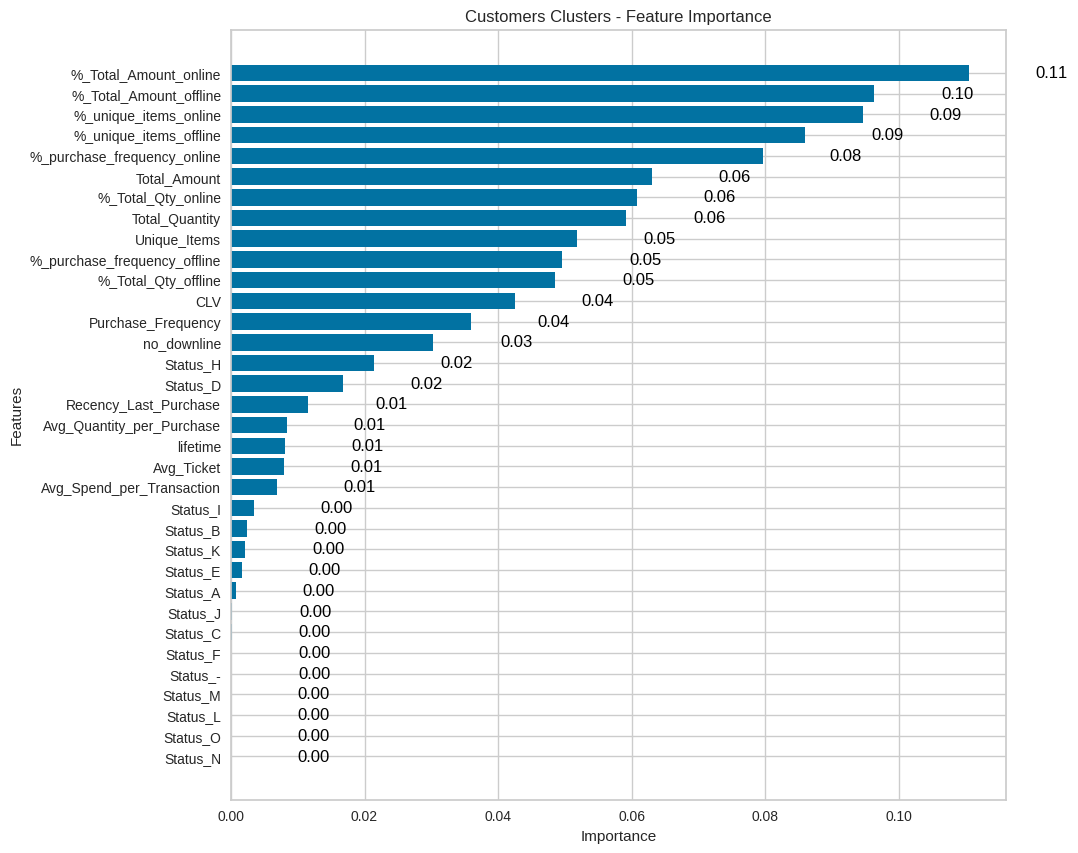

In [58]:

# Sort the DataFrame by importance in ascending order
fimp_sorted = fimp.sort_values('importance')

# Set the figure size
plt.figure(figsize=(10, 10))

# Create a horizontal bar plot with increased spacing between bars
ax = plt.barh(fimp_sorted.index, fimp_sorted['importance'], height=0.8)

# Set plot title and labels
plt.title('Customers Clusters - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Display the importance numbers on the bars
for i, v in enumerate(fimp_sorted['importance']):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

# Show the plot
plt.show()
